In [38]:
#Required packages

# To work with dataframes
import pandas as pd 

# To perform numerical operations
import numpy as np

# To visualize data
import seaborn as sns

# To partition the data
from sklearn.model_selection import train_test_split

# Importing library for logistic regression
from sklearn.linear_model import LogisticRegression

# Importing performance metrics - accuracy score & confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix

In [39]:
# Importing data
data_income = pd.read_csv('income.csv')#,na_values=[" ?"]) 

In [40]:
# Creating a copy of original data                                                                              # Additional strings (" ?") to recognize as NA
data = data_income.copy()

"""
#Exploratory data analysis:

#1.Getting to know the data
#2.Data preprocessing (Missing values)
#3.Cross tables and data visualization
"""

'\n#Exploratory data analysis:\n\n#1.Getting to know the data\n#2.Data preprocessing (Missing values)\n#3.Cross tables and data visualization\n'

In [41]:
# Getting to know the data
# To check variables' data type
print(data.info())

# Check for missing values             
data.isnull()          
       
print('Data columns with null values:\n', data.isnull().sum())
# No missing values !

# Summary of numerical variables
summary_num = data.describe()
print(summary_num)            

# Summary of categorical variables
summary_cate = data.describe(include = "O")
print(summary_cate)

#**** Frequency of each categories
data['JobType'].value_counts()
data['occupation'].value_counts()

# Checking for unique classes
print(np.unique(data['JobType'])) 
print(np.unique(data['occupation']))
# There exists ' ?' instesd of nan

"""
Go back and read the data by including "na_values[' ?']" to consider ' ?' as nan !!!
"""
data = pd.read_csv('income.csv',na_values=[" ?"]) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None
Data columns with null values:
 age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capital

In [42]:
# Data pre-processing
data.isnull().sum()

missing = data[data.isnull().any(axis=1)]
# axis=1 => to consider at least one column value is missing in a row

""" Points to note:
1. Missing values in Jobtype    = 1809
2. Missing values in Occupation = 1816 
3. There are 1809 rows where two specific 
   columns i.e. occupation & JobType have missing values
4. (1816-1809) = 7 => You still have occupation unfilled for 
   these 7 rows. Because, jobtype is Never worked
"""

data2 = data.dropna(axis=0)
data3 = data2.copy()
data4 = data3.copy()
# Realtionship between independent variables
correlation = data2.select_dtypes(include='number').corr()

In [43]:
# Cross tables & Data Visualization
# Extracting the column names
data2.columns   

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [44]:
# Gender proportion table:
gender = pd.crosstab(index = data2["gender"], columns  = 'count', normalize = True)
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [45]:
#  Gender vs Salary Status:
gender_salstat = pd.crosstab(index = data2["gender"],columns = data2['SalStat'], margins = True, normalize =  'index') 
                 # Include row and column totals
print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


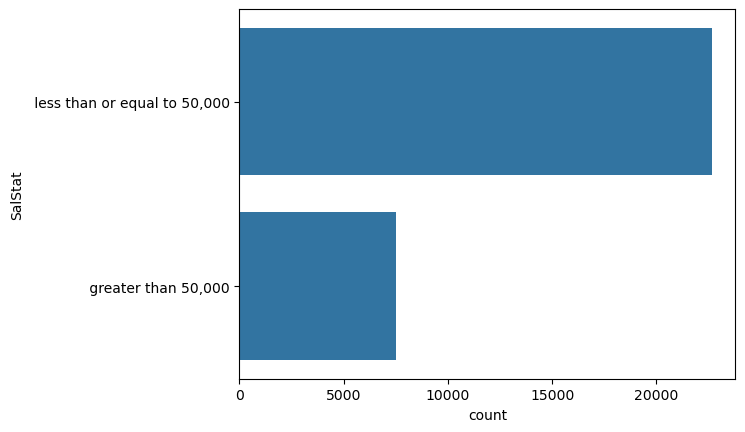

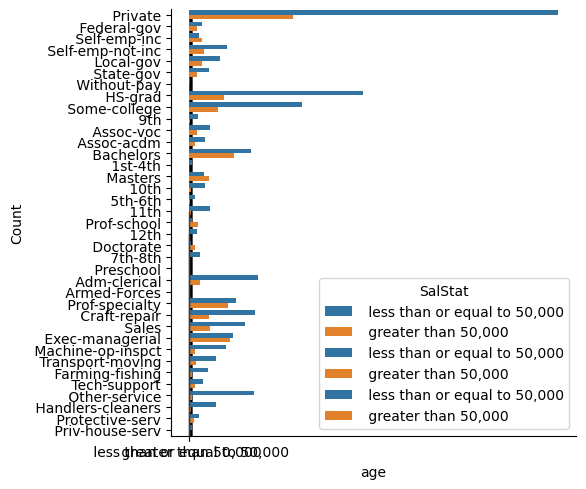

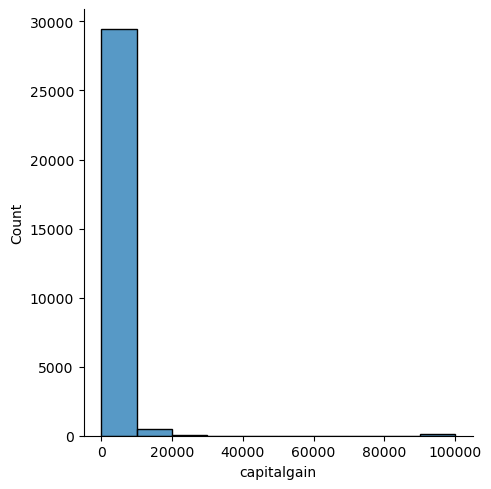

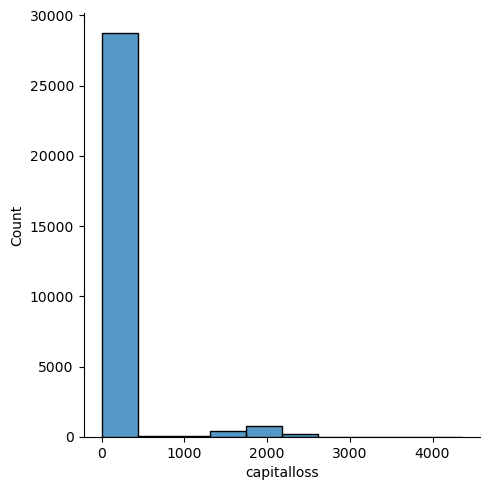

In [46]:
# Frequency distribution of 'Salary status' 
SalStat = sns.countplot(data2['SalStat'])

"""  75 % of people's salary status is <=50,000 
     & 25% of people's salary status is > 50,000
"""

#  Histogram of Age
sns.displot(data2['age'], bins=10, kde=False)
# People with age 20-45 age are high in frequency

# Box Plot - Age vs Salary status
sns.boxplot(x = 'SalStat', y = 'age', data=data2)
data2.groupby('SalStat')['age'].median()

## people with 35-50 age are more likely to earn > 50000 USD p.a
## people with 25-35 age are more likely to earn <= 50000 USD p.a

# Jobtype
JobType     = sns.countplot(y=data2['JobType'],hue = 'SalStat', data=data2)
job_salstat =pd.crosstab(index = data2["JobType"],columns = data2['SalStat'], margins = True, normalize =  'index')  
round(job_salstat*100,1)


# Education
Education   = sns.countplot(y=data2['EdType'],hue = 'SalStat', data=data2)
EdType_salstat = pd.crosstab(index = data2["EdType"], columns = data2['SalStat'],margins = True,normalize ='index')  
round(EdType_salstat*100,1)

# Occupation
Occupation  = sns.countplot(y=data2['occupation'],hue = 'SalStat', data=data2)
occ_salstat = pd.crosstab(index = data2["occupation"], columns =data2['SalStat'],margins = True,normalize = 'index')  
round(occ_salstat*100,1)

# Capital gain
sns.displot(data2['capitalgain'], bins = 10, kde = False)

sns.displot(data2['capitalloss'], bins = 10, kde = False)

In [47]:
# LOGISTIC REGRESSION
# Reindexing the salary status names to 0,1
data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data2['SalStat'])

new_data=pd.get_dummies(data2, drop_first=True)

# Storing the column names 
columns_list=list(new_data.columns)
print(columns_list)

# Separating the input names from data
features=list(set(columns_list)-set(['SalStat']))
print(features)

# Storing the output values in y
y=new_data['SalStat'].values
print(y)

# Storing the values from input features
x = new_data[features].values
print(x)

# Splitting the data into train and test
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3, random_state=0)

# Make an instance of the Model
logistic = LogisticRegression()

# Fitting the values for x and y
logistic.fit(train_x,train_y)
logistic.coef_
logistic.intercept_

# Prediction from test data
prediction = logistic.predict(test_x)
print(prediction)

# Confusion matrix
confusion_matrix = confusion_matrix(test_y, prediction)
print(confusion_matrix)

# Calculating the accuracy
accuracy_score=accuracy_score(test_y, prediction)
print(accuracy_score)

# Printing the misclassified values from prediction

print('Misclassified samples: %d' % (test_y != prediction).sum())

C:\Users\Uday\AppData\Local\Temp\ipykernel_21328\296792291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})


0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64
['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Hand

C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
# LOGISTIC REGRESSION - REMOVING INSIGNIFICANT VARIABLES
# Reindexing the salary status names to 0,1
data3['SalStat']=data3['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data3['SalStat'])

cols = ['gender','nativecountry','race','JobType']
new_data = data3.drop(cols,axis = 1)

new_data=pd.get_dummies(new_data, drop_first=True)

# Storing the column names 
columns_list2=list(new_data.columns)
print(columns_list2)

# Separating the input names from data
features2=list(set(columns_list2)-set(['SalStat']))
print(features2)

# Storing the output values in y
y2=new_data['SalStat'].values
print(y2)

# Storing the values from input features
x2 = new_data[features2].values
print(x2)

# Splitting the data into train and test
train_x2,test_x2,train_y2,test_y2 = train_test_split(x2,y2,test_size=0.3, random_state=0)

# Make an instance of the Model
logistic2 = LogisticRegression()

# Fitting the values for x and y
logistic2.fit(train_x2,train_y2)

# Prediction from test data
prediction2 = logistic2.predict(test_x2)

# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (test_y2 != prediction2).sum())


C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64
['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'oc